### 傅利葉級數

$$f(t) = a_0 + \sum_{n=1}^\infty a_n\sin(\omega t) + b_n \cos(\omega t)$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.arange(10)
y = np.array([14, 18.7, 9, 4.1, 6.7, 6, 6.3, 8.4, 4, 2.9])

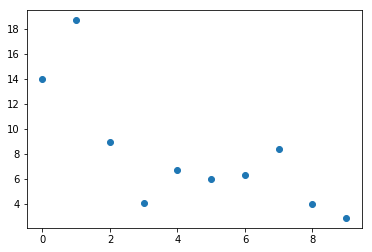

In [6]:
plt.scatter(x,y)

### 原始資料平滑相連

In [7]:
from scipy.interpolate import interp1d

In [12]:
smooth = interp1d(np.append(x, [10]), np.append(y, [14]), 'cubic')

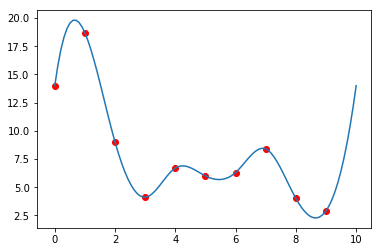

In [13]:
X = np.linspace(0, 10, 100)

plt.plot(X, smooth(X))
plt.scatter(x, y, c='r')

### 計算 $a_0$

$$a_0 = \dfrac{\int_0^T f(t) \, dt}{T}$$

<BarContainer object of 10 artists>

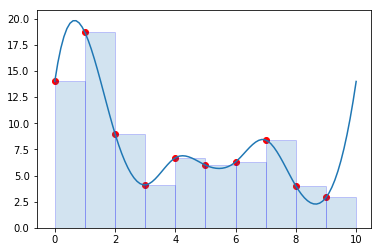

In [15]:
X = np.linspace(0, 10, 100)

plt.plot(X, smooth(X))
plt.scatter(x, y, c='r')
plt.bar(x, y, width=1, alpha=0.2, align='edge', edgecolor='b')

In [16]:
A = y.sum()

In [18]:
T = 10

In [19]:
a0 = A/T

In [20]:
a0

8.010000000000002

### 試玩

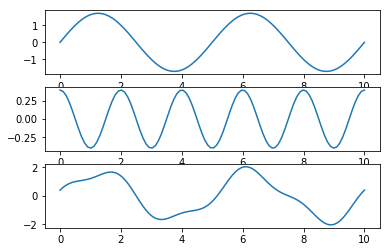

In [25]:
a2 = 1.7
b5 = 0.4

plt.subplot(3,1,1)
plt.plot(X, a2*np.sin(2*2*np.pi/T * X))

plt.subplot(3,1,2)
plt.plot(X, b5*np.cos(5*2*np.pi/T * X))

plt.subplot(3,1,3)
plt.plot(X, a2*np.sin(2*2*np.pi/T * X) + b5*np.cos(5*2*np.pi/T * X))

In [26]:
def myplot(a2, b5):
    plt.plot(X, a2*np.sin(2*2*np.pi/T * X) + b5*np.cos(5*2*np.pi/T * X))

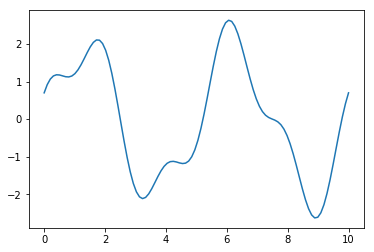

In [27]:
myplot(2,0.7)

In [28]:
from ipywidgets import interact

In [29]:
interact(myplot, a2=(-2.,2.), b5=(-2., 2.))

interactive(children=(FloatSlider(value=0.0, description='a2', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

<function __main__.myplot(a2, b5)>

### 計算 $a_1$

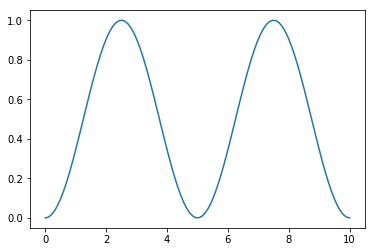

In [31]:
plt.plot(X, np.sin(2*np.pi/T * X)**2)

<BarContainer object of 10 artists>

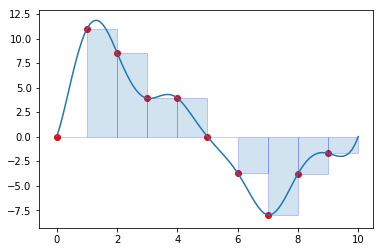

In [37]:
plt.plot(X, smooth(X)*np.sin(2*np.pi/T * X))
plt.scatter(x, y*np.sin(2*np.pi/T * x), c='r')
plt.bar(x, y*np.sin(2*np.pi/T * x), width=1, alpha=0.2, align='edge', edgecolor='b')

In [38]:
ya1 = y*np.sin(2*np.pi/T * x)

In [41]:
a1 = ya1.sum()*2/T

In [42]:
a1

2.037572129708935

$$a_0 + a_1 \sin(\omega t)$$

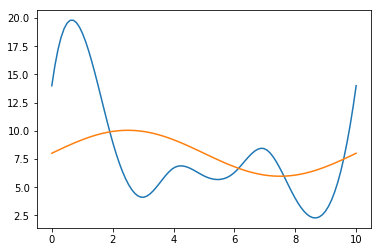

In [44]:
plt.plot(X, smooth(X))
plt.plot(X, a0 + a1*np.sin(2*np.pi/T * X))